In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import dill
import time

from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score

In [3]:
fd = pd.read_csv('fd_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
fd.head()

FileNotFoundError: [Errno 2] File b'fd_centroid.csv' does not exist: b'fd_centroid.csv'

In [4]:
into = pd.read_csv('int_centroid.csv').rename({'Unnamed: 0':'F_index'}, axis=1)
into.head()

,F_index,Filter_01.mzXML,Filter_03.mzXML,Filter_05.mzXML,Filter_075.mzXML,Filter_1.mzXML,Fiter_015.mzXML,QC_1_1.mzXML,QC_1_2.mzXML,QC_1_3.mzXML,...,Sample_2_3.mzXML,Sample_3_1.mzXML,Sample_3_2.mzXML,Sample_3_3.mzXML,Sample_4_1.mzXML,Sample_4_2.mzXML,Sample_4_3.mzXML,Sample_5_1.mzXML,Sample_5_2.mzXML,Sample_5_3.mzXML
0,FT0001,1.985377e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07,2.909245e+06,1.204421e+06,5.782691e+05,2.358231e+05,...,2.416476e+06,1.060825e+05,1.235503e+06,2.549433e+06,9.425606e+05,1.275104e+06,2.468845e+04,1.840586e+05,2.334711e+06,1.844433e+06
1,FT0002,2.299344e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08,3.184920e+07,7.146624e+06,6.044513e+06,7.057294e+06,...,1.139188e+07,5.212445e+06,7.941546e+06,1.145071e+07,4.506232e+06,5.898964e+06,7.796333e+06,4.082660e+06,9.782101e+06,1.010821e+07
2,FT0003,9.452991e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05,8.961250e+05,1.080974e+05,2.695406e+06,8.149278e+05,...,2.040268e+06,1.682951e+06,9.041734e+05,3.132807e+06,5.942570e+05,4.941660e+06,2.499629e+06,5.115905e+05,9.543495e+05,2.396896e+06
3,FT0004,8.826248e+05,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06,9.205393e+05,9.213425e+05,7.294079e+05,4.209642e+06,...,1.389699e+06,3.765011e+06,3.861339e+06,3.948975e+06,9.513658e+05,6.847747e+05,1.646819e+06,5.397383e+06,1.146643e+06,5.507006e+06
4,FT0005,2.814078e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06,5.099740e+05,1.234802e+06,1.142337e+06,1.031051e+06,...,7.653673e+04,1.372942e+05,4.355376e+05,3.037386e+05,7.263154e+04,1.184608e+05,1.641909e+05,7.470728e+05,6.875941e+05,6.159486e+05


In [5]:
into.shape

(8679, 37)

### Number of samples were involved in every feature

In [6]:
fd['X1'].value_counts().sort_index(ascending=False)

36    3435
35     534
34     338
33     294
32     263
31     226
30     189
29     158
28     157
27     170
26     164
25     130
24     133
23     156
22     144
21     138
20     129
19     183
18     149
17     463
16     192
15     166
14     193
13     200
12     181
11     194
Name: X1, dtype: int64

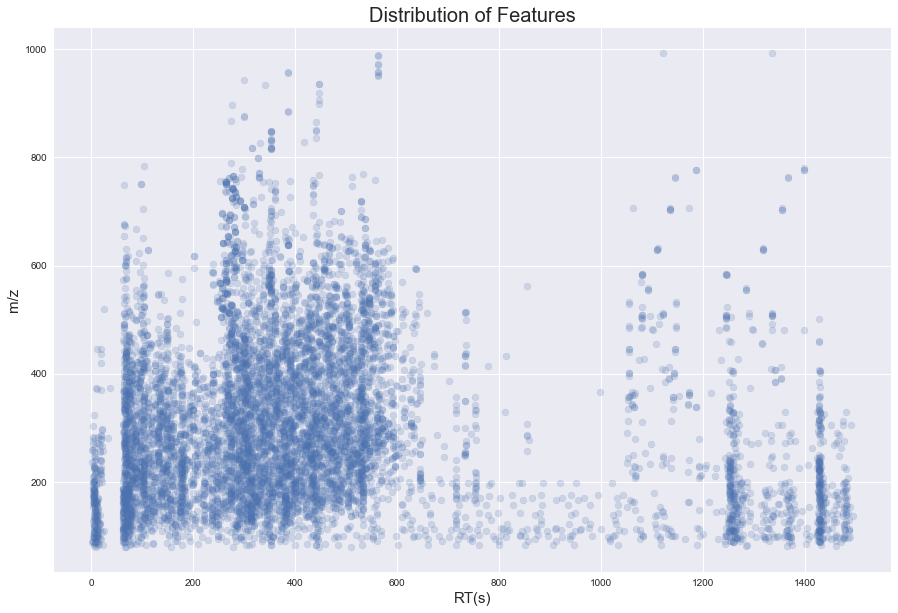

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
scatters = plt.scatter(fd['rtmed'], fd['mzmed'], alpha=.2)
ax = plt.gca()
ax.set_xlabel('RT(s)', fontsize=15)
ax.set_ylabel('m/z', fontsize=15)
ax.set_title('Distribution of Features', fontsize=20)
plt.savefig('dist1.png')

In [8]:
scatters.get_facecolors()

array([[0.29803922, 0.44705882, 0.69019608, 0.2       ]])

# Filters

In [9]:
filters = into.iloc[:, :7]
filters = filters.iloc[:,[0,1,6,2,3,4,5]]
filters = filters.rename({'Filter_01.mzXML':  '0.10',
                          'Fiter_015.mzXML': '0.15',
                          'Filter_03.mzXML':  '0.30', 
                          'Filter_05.mzXML':  '0.50', 
                          'Filter_075.mzXML': '0.75',
                          'Filter_1.mzXML':   '1.00'}, 
                          axis=1)
filters.head()

,F_index,0.10,0.15,0.30,0.50,0.75,1.00
0,FT0001,1.985377e+06,2.909245e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07
1,FT0002,2.299344e+07,3.184920e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08
2,FT0003,9.452991e+05,8.961250e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05
3,FT0004,8.826248e+05,9.205393e+05,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06
4,FT0005,2.814078e+05,5.099740e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06


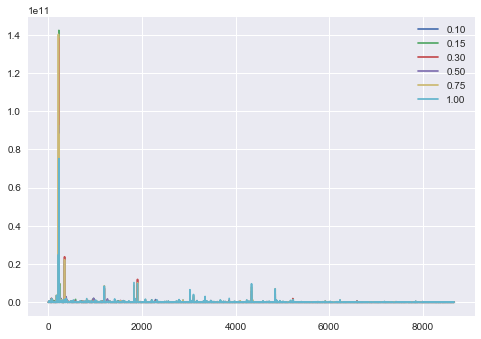

In [10]:
filters.iloc[:,1:].plot()

In [11]:
def get_R2(x):
    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    y_hat = x[1:] / x[-1]
    return r2_score(y_i, y_hat)

In [12]:
get_R2(np.array([0, 1, 1.5, 3, 5, 7.5, 10]))

1.0

In [13]:
y = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
y_hat = np.array([0.1,0.15, 0.3, 0.5, 0.75, 1])
r2_score(y, y_hat)

1.0

In [14]:
filters['R2'] = filters.dropna().apply(get_R2, axis=1)

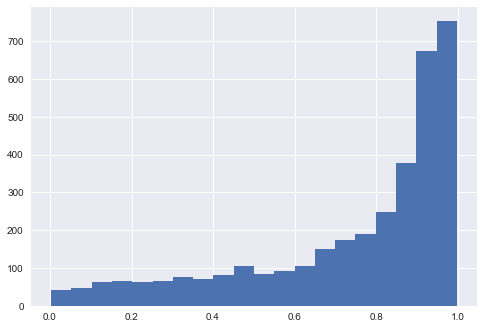

In [15]:
filters[filters['R2'] > 0].sort_values(by='R2', ascending=False).R2.hist(bins=20)

Text(0.5, 0, '$R^2$')

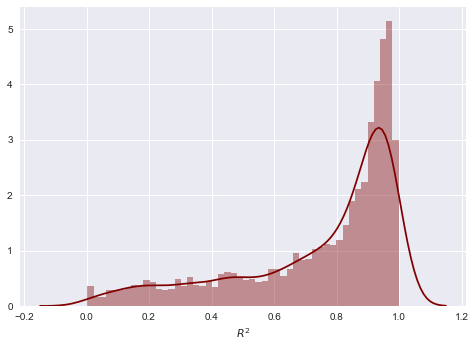

In [10]:
plt.style.use('seaborn')
sns.distplot(filters[filters['R2'] > 0].R2, color='maroon', bins=50)
plt.xlabel('$R^2$')

In [17]:
R2_greater08 = filters[filters['R2'] > 0.8].index
fd['filter_pass'] = 0
fd.iloc[R2_greater08, -1]= 1
fd['filter_pass'].value_counts().iloc[:10]

0    6631
1    2048
Name: filter_pass, dtype: int64

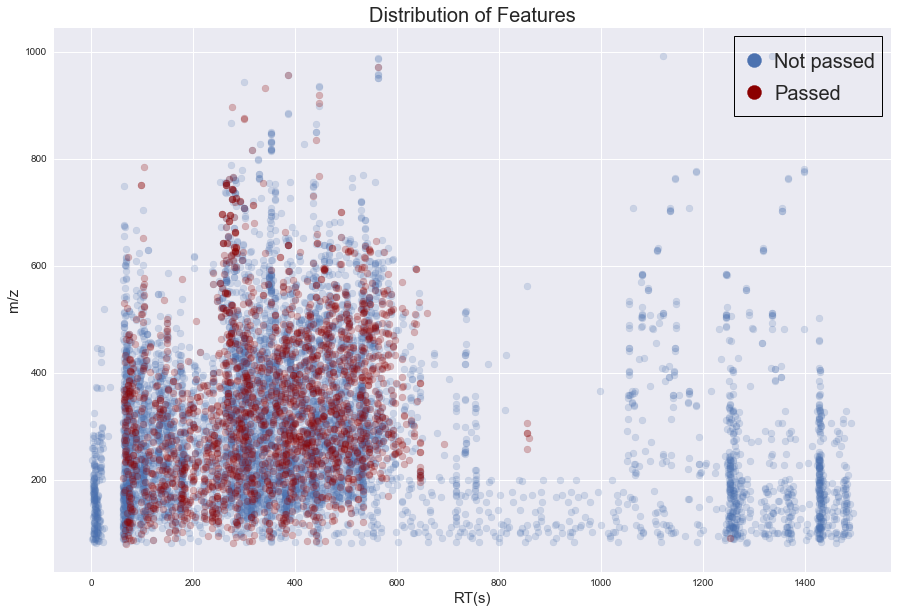

In [19]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
f_pass = fd[fd['filter_pass'] == 1]
f_not_pass = fd[fd['filter_pass'] == 0]

plt.scatter(f_not_pass['rtmed'], f_not_pass['mzmed'], alpha=.2, c=[[0.29803922, 0.44705882, 0.69019608]], label='Not pass')
plt.scatter(f_pass['rtmed'], f_pass['mzmed'], alpha=.25, c='darkred', label='Pass')
ax = plt.gca()
ax.set_xlabel('RT(s)', fontsize=15)
ax.set_ylabel('m/z', fontsize=15)
ax.set_title('Distribution of Features', fontsize=20)

top = 970
left = 1300
ax.text(left+40, top, 'Not passed', fontsize=20)
ax.text(left+40, top-60, 'Passed', fontsize=20)
plt.scatter(left, top+15, c=[[0.29803922, 0.44705882, 0.69019608]], s=200)
plt.scatter(left, top-45, c='darkred', s=200)
rect = Rectangle((1260,880), 290, 150, fill=False, edgecolor='k', linewidth=1)
ax.add_patch(rect)
plt.savefig('dist2.png')

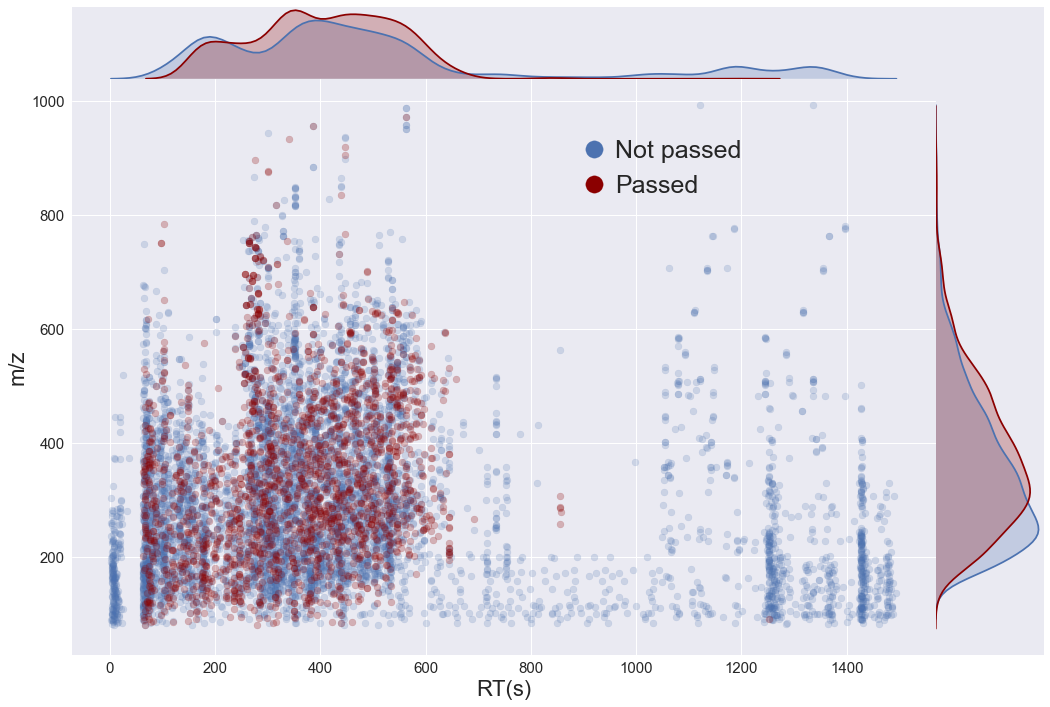

In [14]:
plt.figure(figsize=(15,10))
ax1 = plt.axes([0.9, 0.1, 0.1, .8])
sns.kdeplot(f_not_pass['mzmed'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], vertical=True, ax=ax1)
sns.kdeplot(f_pass['mzmed'], shade=True, color='darkred', vertical=True, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend('')

ax2 = plt.axes([0.1, 0.1, 0.8, 0.8])
ax2.scatter(f_not_pass['rtmed'], f_not_pass['mzmed'], alpha=.2, c=[[0.29803922, 0.44705882, 0.69019608]], label='Not pass')
ax2.scatter(f_pass['rtmed'], f_pass['mzmed'], alpha=.25, c='darkred', label='Pass')
ax2.set_xlabel('RT(s)', fontsize=22)
ax2.set_ylabel('m/z', fontsize=22)
ax2.tick_params(labelsize=15)

top = 900
left = 920
ax2.text(left+40, top, 'Not passed', fontsize=25)
ax2.text(left+40, top-60, 'Passed', fontsize=25)
ax2.scatter(left, top+15, c=[[0.29803922, 0.44705882, 0.69019608]], s=300)
ax2.scatter(left, top-45, c='darkred', s=300)

ax3 = plt.axes([0.1, 0.9, 0.8, 0.1])
sns.kdeplot(f_not_pass['rtmed'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], ax=ax3)
sns.kdeplot(f_pass['rtmed'], shade=True, color='darkred', ax=ax3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('')
ax3.legend('')

ax4 = plt.axes([0.9, 0.9, 0.1, 0.1])
ax4.set_xticks([])
ax4.set_yticks([]) 

plt.savefig('distribution.png')

In [20]:
def first_drop(x):
    x = x.fillna(-1)
    x = x[1:7]
    pivot = True
    if x[3] == -1 or x[4] == -1 or x[5] == -1:
        return False
    for i in range(5,-1,-1):
        
        if pivot:
            if x[i] == -1:
                pivot = False
        else:
            if not x[i] == -1:
                return False
    
    return True

In [21]:
test = filters.copy()

In [22]:
test['normal?'] = test.apply(first_drop, axis=1)
test.head()

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?
0,FT0001,1.985377e+06,2.909245e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07,0.877360,True
1,FT0002,2.299344e+07,3.184920e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08,0.792445,True
2,FT0003,9.452991e+05,8.961250e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05,-67.272395,True
3,FT0004,8.826248e+05,9.205393e+05,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06,-7.890818,True
4,FT0005,2.814078e+05,5.099740e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06,0.900441,True


In [23]:
print(test.shape)
test = test[test['normal?'] == True]
print(test.shape)

(8679, 9)
(8087, 9)


In [24]:
print(test.shape)
test = test[test['normal?'] == True]
print(test.shape)

(8087, 9)
(8087, 9)


In [25]:
def get_R2_modify(x):
    x = x.fillna(-1)
    x = x[1:7]

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

In [26]:
test.head()

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?
0,FT0001,1.985377e+06,2.909245e+06,4.908377e+06,6.936050e+06,8.752023e+06,1.064056e+07,0.877360,True
1,FT0002,2.299344e+07,3.184920e+07,5.211685e+07,7.504573e+07,9.232607e+07,1.060672e+08,0.792445,True
2,FT0003,9.452991e+05,8.961250e+05,1.023743e+06,4.825853e+06,1.365038e+06,7.261568e+05,-67.272395,True
3,FT0004,8.826248e+05,9.205393e+05,5.140370e+06,9.308512e+06,2.736374e+06,3.617496e+06,-7.890818,True
4,FT0005,2.814078e+05,5.099740e+05,1.389269e+06,2.004741e+06,2.873223e+06,3.163359e+06,0.900441,True


In [27]:
test['R2_modified'] = test.apply(get_R2_modify, axis=1)

In [28]:
test[test['R2_modified'] > 0.8].shape

(2385, 10)

In [29]:
filters[filters['R2'] > 0.8].shape

(2048, 8)

In [30]:
new_index = test[test['R2_modified'] > 0.8].index
old_index = filters[filters['R2'] > 0.8].index

In [31]:
(new_index ^ old_index).shape

(337,)

In [32]:
filters.iloc[-1,:]

F_index         FT8679
0.10               NaN
0.15               NaN
0.30               NaN
0.50       1.11397e+07
0.75       2.45459e+06
1.00       1.26722e+07
R2                 NaN
Name: 8678, dtype: object

In [33]:
test.loc[(new_index ^ old_index)]

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?,R2_modified
317,FT0318,NaN,NaN,NaN,2.924141e+07,6.111828e+07,7.353716e+07,NaN,True,0.863536
332,FT0333,NaN,2.828508e+05,3.073605e+05,5.599674e+05,9.957535e+05,1.448601e+06,NaN,True,0.943147
601,FT0602,NaN,NaN,1.988254e+05,7.068781e+05,1.120963e+06,1.308735e+06,NaN,True,0.874007
607,FT0608,NaN,2.058752e+04,1.285783e+05,7.704861e+05,8.060234e+05,1.283442e+06,NaN,True,0.822660
616,FT0617,NaN,NaN,NaN,5.537164e+07,9.494682e+07,1.093775e+08,NaN,True,0.888173
785,FT0786,NaN,NaN,5.409492e+05,1.038642e+06,1.234494e+06,1.782378e+06,NaN,True,0.963342
915,FT0916,NaN,NaN,NaN,9.953080e+05,1.412445e+06,2.250176e+06,NaN,True,0.853739
1087,FT1088,NaN,7.098653e+04,1.425168e+05,9.488852e+05,1.250806e+06,1.581908e+06,NaN,True,0.857096
1237,FT1238,NaN,8.384435e+04,5.670201e+05,6.012600e+05,1.271348e+06,1.757619e+06,NaN,True,0.921578
1277,FT1278,NaN,NaN,2.882748e+05,1.017596e+06,1.629485e+06,1.877542e+06,NaN,True,0.865970


In [34]:
f_pass.shape

(2048, 10)

In [35]:
f_modified = fd.loc[(new_index ^ old_index)]
f_modified.shape

(337, 10)

In [36]:
f_not_pass_true = f_not_pass[~(f_not_pass.index.isin(new_index))]

In [37]:
f_not_pass_true.shape, f_pass.shape, f_modified.shape

((6294, 10), (2048, 10), (337, 10))

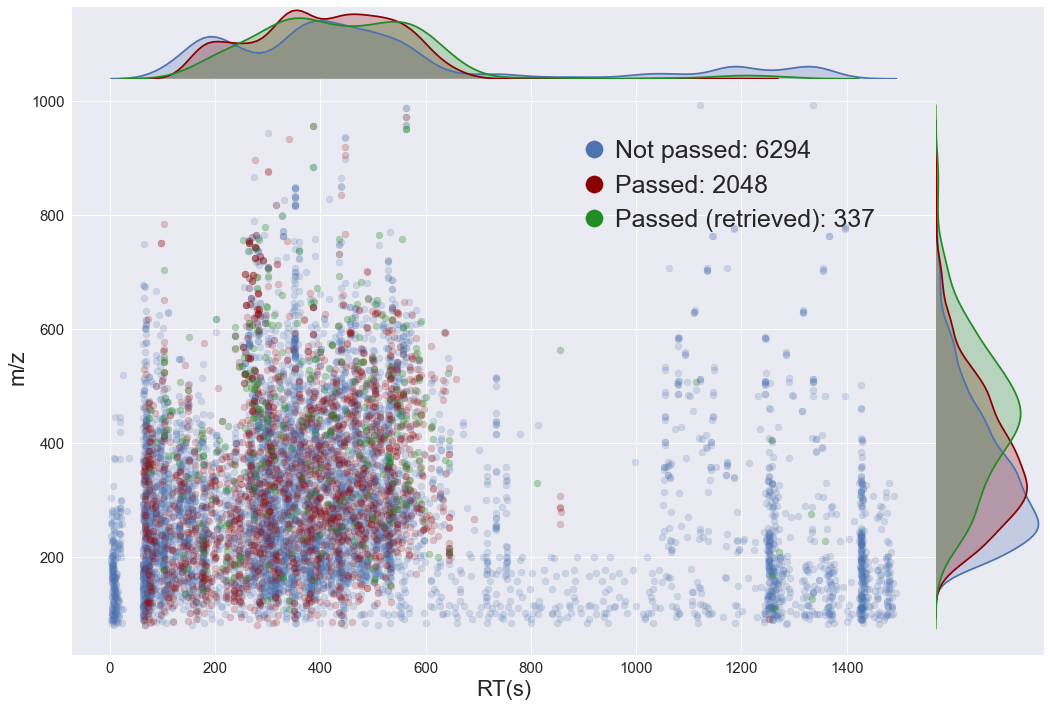

In [105]:
plt.figure(figsize=(15,10))
ax1 = plt.axes([0.9, 0.1, 0.1, .8])
sns.kdeplot(f_not_pass_true['mzmed'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], vertical=True, ax=ax1)
sns.kdeplot(f_pass['mzmed'], shade=True, color='darkred', vertical=True, ax=ax1)
sns.kdeplot(f_modified['mzmed'], shade=True, color='forestgreen', vertical=True, ax=ax1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend('')

ax2 = plt.axes([0.1, 0.1, 0.8, 0.8])
ax2.scatter(f_not_pass_true['rtmed'], f_not_pass_true['mzmed'], alpha=.2, c=[[0.29803922, 0.44705882, 0.69019608]], label='Not pass')
ax2.scatter(f_pass['rtmed'], f_pass['mzmed'], alpha=.2, c='darkred', label='Pass')
ax2.scatter(f_modified['rtmed'], f_modified['mzmed'], alpha=.3, c='forestgreen')
ax2.set_xlabel('RT(s)', fontsize=22)
ax2.set_ylabel('m/z', fontsize=22)
ax2.tick_params(labelsize=15)

top = 900
left = 920
ax2.text(left+40, top, 'Not passed: 6294', fontsize=25)
ax2.text(left+40, top-60, 'Passed: 2048', fontsize=25)
ax2.text(left+40, top-120, 'Passed (retrieved): 337', fontsize=25)
ax2.scatter(left, top+15, c=[[0.29803922, 0.44705882, 0.69019608]], s=300)
ax2.scatter(left, top-45, c='darkred', s=300)
ax2.scatter(left, top-105, c='forestgreen', s=300)

ax3 = plt.axes([0.1, 0.9, 0.8, 0.1])
sns.kdeplot(f_not_pass_true['rtmed'], shade=True, color=[0.29803922, 0.44705882, 0.69019608], ax=ax3)
sns.kdeplot(f_pass['rtmed'], shade=True, color='darkred', ax=ax3)
sns.kdeplot(f_modified['rtmed'], shade=True, color='forestgreen', ax=ax3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel('')
ax3.legend('')

ax4 = plt.axes([0.9, 0.9, 0.1, 0.1])
ax4.set_xticks([])
ax4.set_yticks([]) 

plt.savefig('distribution_modified.png')

# Order of Sample Sequence

In [39]:
snames = ['QC 2-3', 'QC 1-1', 'QC 2-2', 'QC 4-2', 'QC 1-3', 'QC 5-2', 'QC 5-1', 'QC 2-1', 
         'Sample 4-2', 'Filter 0.3', 'Sample 1-2', 'QC 3-1',
         'Sample 5-2', 'Sample 3-2', 'Sample 1-3', 'QC 1-2',
         'Sample 5-1', 'Sample 2-2', 'Sample 5-3', 'QC 5-3',
         'Filter 0.75', 'Sample 3-3', 'Sample 4-1', 'QC 3-3',
         'Filter 1.0', 'Sample 2-3', 'Sample 4-3', 'QC 3-2', 
         'Filter 0.1', 'Filter 0.5', 'Sample 1-1', 'QC 4-3', 
         'Sample 2-1', 'Filter 0.15', 'Sample 3-1', 'QC 4-1']

In [40]:
snames_df = pd.DataFrame(snames, columns=['Sname'])

In [41]:
def classify(x):
    return x[0][:2]

In [42]:
snames_df['Class'] = snames_df.apply(classify, axis=1)
snames_df.head()

,Sname,Class
0,QC 2-3,QC
1,QC 1-1,QC
2,QC 2-2,QC
3,QC 4-2,QC
4,QC 1-3,QC


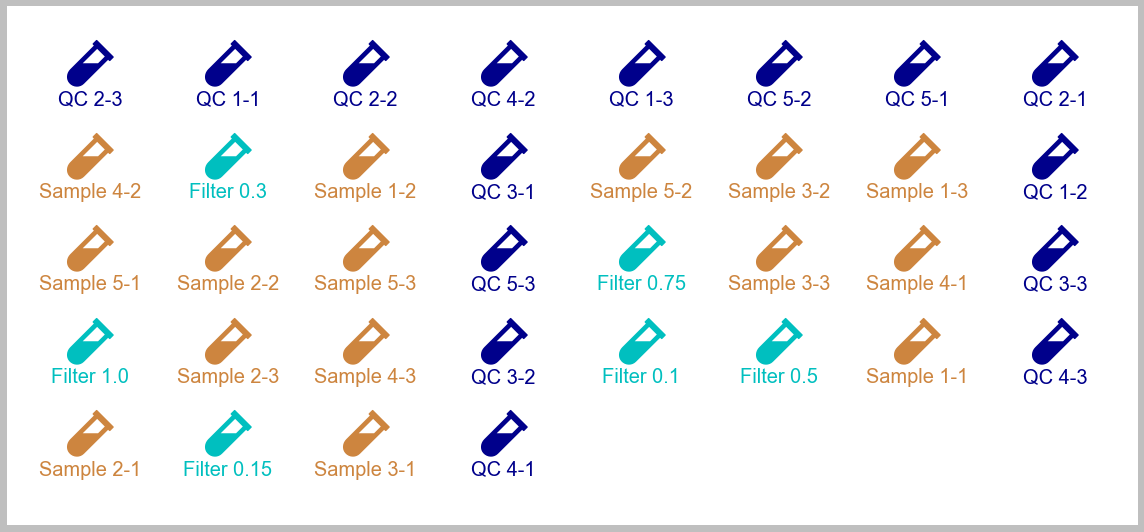

In [43]:
fp1 = FontProperties(fname="../fontawesome-free-5.7.2-desktop/otfs/Font Awesome 5 Free-Solid-900.otf")

cmap = dict(QC='darkblue', Sa='peru', Fi='c')

plt.style.use(plt.style.available[6])

plt.figure(figsize=(16,7.5))

ax=plt.gca()

for i in range(snames_df.shape[0]):
    x = (i % 8)*2.5 + 1.5
    y = -(i // 8)
    cls = snames_df.iloc[i,1]
    sname = snames_df.iloc[i,0]
    ax.text(x, y, '\uf492', fontproperties=fp1, size=50, color=cmap[cls],
           ha='center', va='center')
    ax.text(x, y-0.4, sname, size=20, color=cmap[cls],
           ha='center', va='center')
ax.set_xlim(0,20.5)
ax.set_ylim(-5,0.6)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('Injection sequence.png')

In [44]:
QCs_eq = into.iloc[:, [12, 7, 11, 17, 9, 20, 19, 10]]
QCs_nor = into.iloc[:, [13, 8, 21, 15, 14, 18, 16]]

In [45]:
Samples = into.iloc[:, 22:]
Samples_ordered = Samples.iloc[:, [10, 1, 13, 7, 2, 12, 4, 14, 8, 9, 5, 11, 0, 3, 6]]

In [46]:
noise_index, pass_index, pass_modified_index = f_not_pass_true.index, f_pass.index, f_modified.index

In [47]:
int(np.log10(9.7e6))

6

In [55]:
def RSD(x):
    return int(np.log10(np.mean(x))), np.std(x) / np.mean(x)

In [49]:
(pass_index | pass_modified_index).shape

(2385,)

In [57]:
check = QCs_nor.loc[pass_index | pass_modified_index].dropna()

In [51]:
check['mag'], check['RSD'] = check.apply(RSD, axis=1).str

In [52]:
check.sort_values(by='mag', ascending=False)

,QC_3_1.mzXML,QC_1_2.mzXML,QC_5_3.mzXML,QC_3_3.mzXML,QC_3_2.mzXML,QC_4_3.mzXML,QC_4_1.mzXML,mag,RSD
4847,2.616341e+09,2.464244e+09,2.331613e+09,2.084946e+09,2.436210e+09,2.928084e+09,2.247839e+09,9,0.103103
1828,4.520577e+09,4.681678e+09,4.275207e+09,4.284365e+09,4.316533e+09,4.709174e+09,4.396949e+09,9,0.038346
4342,3.159162e+09,3.355066e+09,3.120329e+09,2.884269e+09,2.941343e+09,3.368126e+09,3.160087e+09,9,0.054387
3101,1.258405e+09,1.387141e+09,1.297383e+09,1.181773e+09,1.223514e+09,1.386891e+09,1.287321e+09,9,0.055646
3349,1.019873e+09,1.110990e+09,1.031606e+09,8.966371e+08,9.468425e+08,1.084719e+09,9.813254e+08,9,0.068992
3024,1.496343e+09,1.385190e+09,1.590945e+09,1.651905e+09,1.170487e+09,1.338882e+09,1.292511e+09,9,0.111535
3541,1.144617e+08,1.276080e+08,1.175738e+08,1.006088e+08,1.078686e+08,1.230644e+08,1.115949e+08,8,0.073678
3102,1.045682e+08,1.100738e+08,1.086241e+08,9.067999e+07,9.657736e+07,1.133505e+08,1.055371e+08,8,0.070766
484,2.216942e+08,2.341714e+08,2.141932e+08,1.985891e+08,2.043675e+08,2.290923e+08,2.037794e+08,8,0.058792
525,1.334500e+08,1.423028e+08,1.322586e+08,1.233827e+08,1.312024e+08,1.435485e+08,1.334769e+08,8,0.047443


In [53]:
check[check['mag'] >= 7].shape

(340, 9)

In [54]:
check[check['RSD'] <= 0.2].shape

(1468, 9)

In [55]:
check_not = QCs_nor.loc[noise_index].dropna()
check_not['mag'], check_not['RSD'] = check_not.apply(RSD, axis=1).str
check_not.sort_values(by='mag', ascending=False)

,QC_3_1.mzXML,QC_1_2.mzXML,QC_5_3.mzXML,QC_3_3.mzXML,QC_3_2.mzXML,QC_4_3.mzXML,QC_4_1.mzXML,mag,RSD
219,2.482474e+10,1.053159e+09,1.418810e+06,5.338312e+08,4.001398e+10,5.136604e+10,2.902307e+10,10,0.922467
213,8.168870e+09,1.157232e+11,3.930756e+09,5.311983e+07,3.969536e+09,5.777084e+08,1.618764e+09,10,2.063189
222,1.458473e+11,6.202338e+07,2.473717e+10,8.777547e+10,3.111406e+10,5.784494e+10,1.763454e+11,10,0.811681
224,3.042115e+10,2.181142e+10,1.160619e+10,7.143028e+10,9.350153e+09,3.569692e+10,9.768027e+09,10,0.753879
380,8.225581e+08,6.195216e+08,9.936617e+08,9.070227e+08,1.442356e+09,1.623191e+09,7.443053e+08,9,0.337204
63,1.931146e+09,3.763723e+06,1.801845e+09,3.533553e+06,1.768689e+09,9.995257e+06,1.787780e+09,9,0.862487
1905,5.515261e+08,1.083685e+10,2.174858e+08,9.379947e+09,4.226671e+08,8.504430e+06,2.794523e+08,9,1.436567
1904,1.186749e+10,3.111155e+08,1.051902e+10,1.563844e+07,9.844937e+09,2.732767e+08,1.002484e+10,9,0.843538
1192,1.015649e+10,1.717581e+08,9.045600e+09,1.130981e+08,8.278393e+09,1.876745e+08,3.043105e+06,9,1.127514
1540,1.048888e+09,1.031423e+09,1.031649e+09,1.058208e+09,1.053275e+09,1.002567e+09,9.888576e+08,9,0.023597


In [56]:
check_not[check_not['RSD'] <= 0.2].shape

(2278, 9)

In [57]:
check_not.shape

(5376, 9)

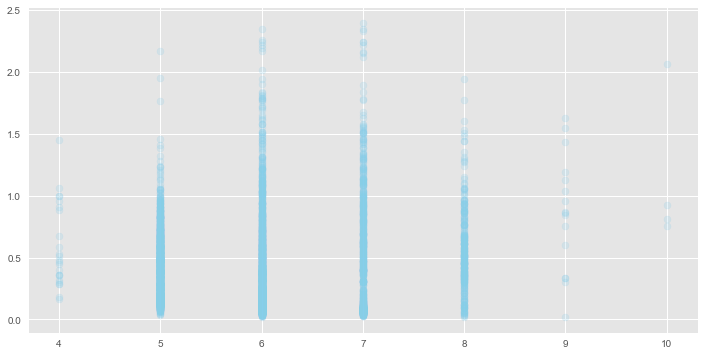

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.scatter(check_not['mag'], check_not['RSD'], alpha=.2, c='skyblue')

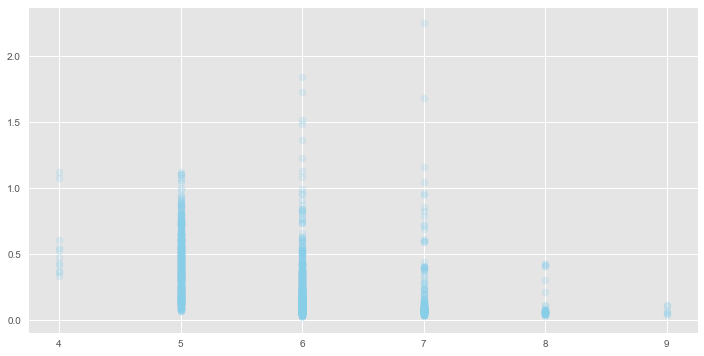

In [62]:
plt.figure(figsize=(12, 6))
plt.scatter(check['mag'], check['RSD'], alpha=.2, c='skyblue')

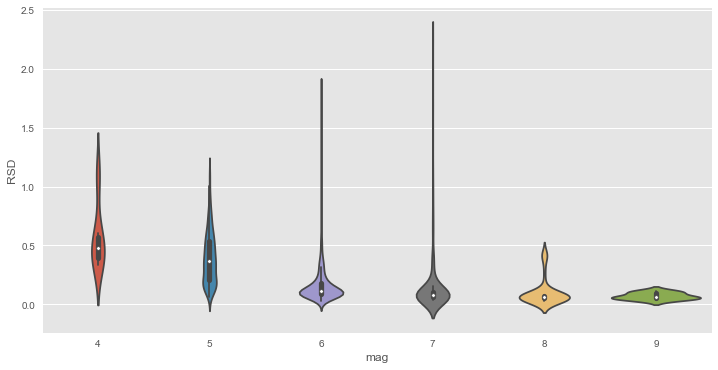

In [63]:
plt.figure(figsize=(12,6))
sns.violinplot(x='mag', y='RSD', data=check)

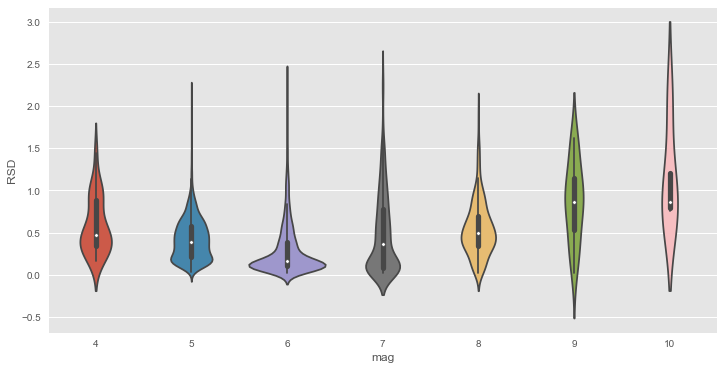

In [64]:
plt.figure(figsize=(12,6))
sns.violinplot(x='mag', y='RSD', data=check_not)

In [65]:
check_not[check_not['mag'] == 9].RSD.sort_values()

1540    0.023597
226     0.299747
338     0.336856
380     0.337204
228     0.599868
225     0.752631
1904    0.843538
63      0.862487
364     0.869010
227     0.960373
354     1.035103
1192    1.127514
239     1.194453
1905    1.436567
220     1.550886
342     1.627020
Name: RSD, dtype: float64

In [66]:
dill.dump_session('p.pyData')

# Peak Figure 3D

In [4]:
filters.columns

Index(['F_index', '0.10', '0.15', '0.30', '0.50', '0.75', '1.00', 'R2'], dtype='object')

In [36]:
conc = '0.30'

In [37]:
threeD = pd.merge(fd, filters, on='F_index').loc[:,['mzmed', 'rtmed', conc]].dropna()

mzmin, mzmax = threeD['mzmed'].min(), threeD['mzmed'].max()

mzmin = round(mzmin)
mzmax = round(mzmax)

rt_range = np.arange(1, 1501, 1500/500)
mz_range = np.arange(mzmin, mzmax, (mzmax-mzmin)/500)

threeD['RT'] = pd.cut(threeD['rtmed'], bins=500, labels=rt_range)
threeD['mz'] = pd.cut(threeD['mzmed'], bins=500, labels=mz_range)

threeD = threeD[[conc, 'RT', 'mz']]

x = rt_range
y = mz_range
x, y = np.meshgrid(x, y)

mat = threeD.groupby(['RT', 'mz']).mean()

mat = mat.unstack().fillna(1).T

z = mat.values.ravel().reshape(500,500)

z = np.log(z)

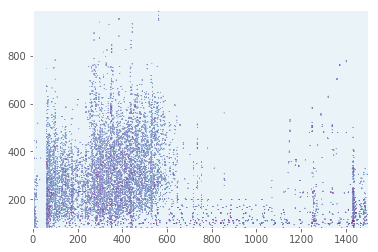

In [38]:
plt.contourf(x, y, z, cmap=plt.cm.BuPu)

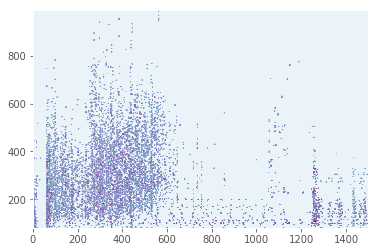

In [32]:
plt.contourf(x, y, z, cmap=plt.cm.BuPu)

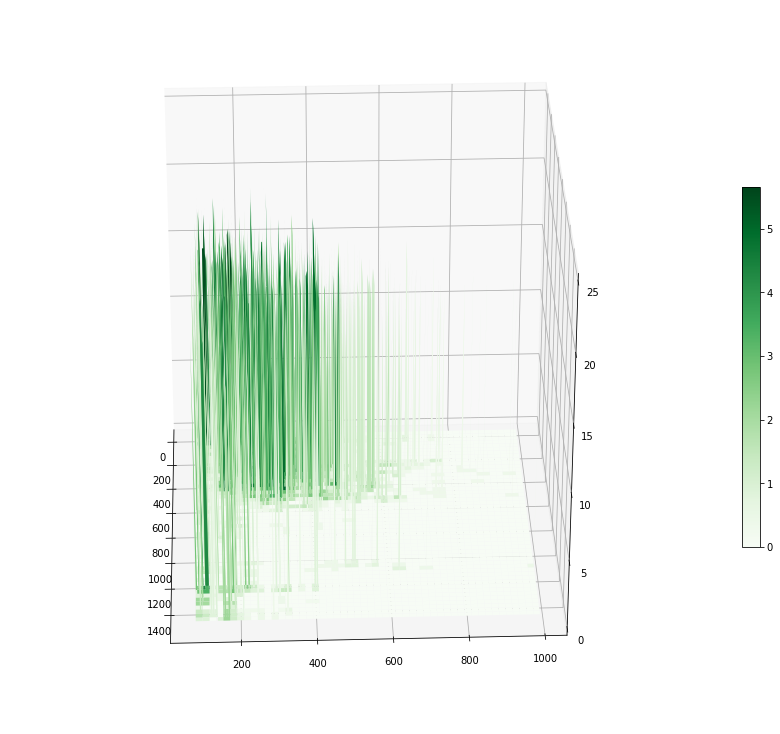

In [45]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, cmap=plt.cm.Greens, 
                       rstride=10, cstride=10, 
                      edgecolor=None, linewidth=0)

fig.colorbar(surf, shrink=.5)

os.system('mkdir peak3D')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    plt.savefig('peak3D/peak_%.3d.png' % angle)
os.system('magick -delay 10 -loop 0 peak3D//peak_*.png peak3D.gif')

0

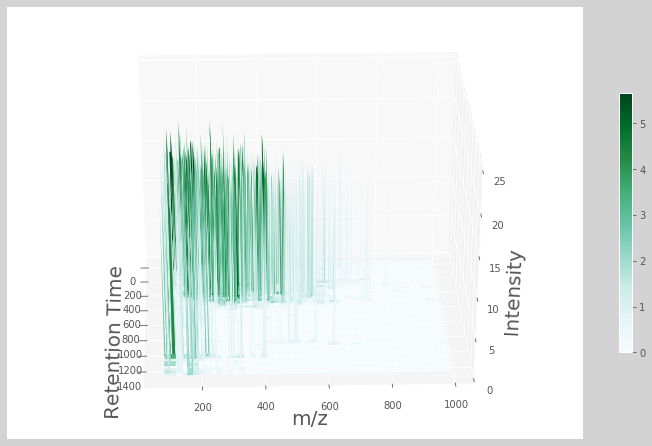

In [4]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

ax = Axes3D(fig)

surf = ax.plot_surface(x, y, z, 
                       cmap=plt.cm.BuGn, 
                       rstride=10, cstride=10,
                      edgecolor=None, linewidth=0)
fig.set_facecolor('lightgrey')
fig.colorbar(surf, shrink=.6)
ax.set_facecolor('w')

os.system('mkdir peak3D_v1.1')
for angle in range(0, 360, 2):
    ax.view_init(30, angle)
    ax.set_xlabel('Retention Time', fontsize=20)
    ax.set_ylabel('m/z', fontsize=20)
    ax.set_zlabel('Intensity', fontsize=20)
    
    fig.savefig('peak3D_v1.1/peak_%.3d.png' % angle)

os.system('magick -delay 10 -loop 0 peak3D_v1.1//peak_*.png peak3D_v1.1.gif')

In [21]:
dill.dump_session('2_17.pyData')

In [159]:
peaktable = pd.read_csv('cp_centroid.csv').rename({'Unnamed: 0':'Peak_index'}, axis=1)

peaktable = peaktable[peaktable['sample'] == 5]

peaktable = peaktable[['mz', 'rt', 'into']]

peaktable.isnull().sum()

mz      0
rt      0
into    0
dtype: int64

In [155]:
bins_rt = 1000
bins_mz = 500

rts = np.arange(peaktable['rt'].min(), peaktable['rt'].max(), (peaktable['rt'].max()-peaktable['rt'].min())/bins_rt)
mzs = np.arange(peaktable['mz'].min(), peaktable['mz'].max(), (peaktable['mz'].max()-peaktable['mz'].min())/bins_mz)

peaktable['rt'] = pd.cut(peaktable['rt'], bins_rt)
peaktable['mz'] = pd.cut(peaktable['mz'], bins_mz)

In [156]:
def get_med(x):
    return x[0].right, x[1].right

In [157]:
peaktable['mz'], peaktable['rt'] = peaktable.apply(get_med, axis=1).str

In [158]:
raw_mat = peaktable.groupby(['rt','mz']).mean()
raw_mat = raw_mat.unstack()
raw_mat = raw_mat.fillna(1)

In [150]:
raw_mat.shape

(844, 452)

In [151]:
rt0 = peaktable['rt'].sort_values().unique()
mz0 = peaktable['mz'].sort_values().unique()
rt0, mz0 = np.meshgrid(rt0, mz0)
z0 = raw_mat.values.ravel().reshape(844,452).T
z0 = np.log(z0)

In [152]:
rt0.shape, mz0.shape, z0.shape

((452, 844), (452, 844), (452, 844))

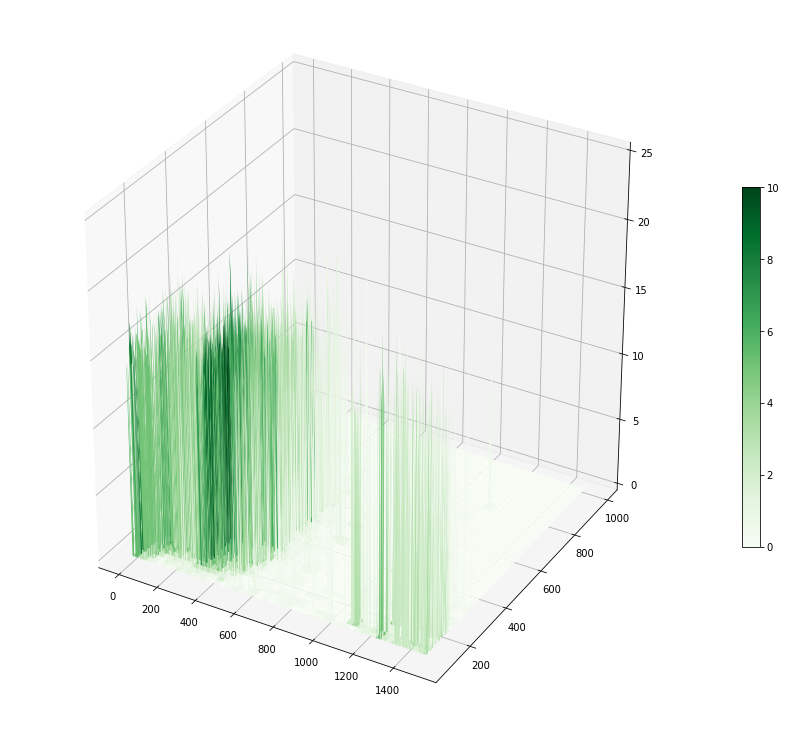

In [153]:
fig = plt.figure(figsize=(12,10))

ax = Axes3D(fig)

surf = ax.plot_surface(rt0, mz0, z0, cmap=plt.cm.Greens, 
                       #rstride=1, cstride=1, 
                      #edgecolor=None, linewidth=0
                      )

fig.colorbar(surf, shrink=.5)

# QC

* **DataSets:** QCs_eq, QCs_nor, Samples, Samples_ordered
* **Indexes:**noise_index, pass_index, pass_modified_index
* **Fun:** RSD( return 'mag' and 'RSD')

In [8]:
def RSD_modified(x):
    return int(np.log10(np.mean(x))), np.mean(x), np.std(x, ddof=1) / np.mean(x)   

In [9]:
plt.style.use('seaborn')

In [386]:
QCs_total = QCs_nor.dropna()
QCs_pass = QCs_nor.loc[pass_index | pass_modified_index].dropna()
QCs_noise = QCs_nor.loc[noise_index].dropna()

QCs_total['mag'], QCs_total['mean'], QCs_total['RSD'] = QCs_total.apply(RSD_modified, axis=1).str
QCs_pass['mag'], QCs_pass['mean'], QCs_pass['RSD'] = QCs_pass.apply(RSD_modified, axis=1).str
QCs_noise['mag'], QCs_noise['mean'], QCs_noise['RSD'] = QCs_noise.apply(RSD_modified, axis=1).str

QCs_total.shape, QCs_pass.shape, QCs_noise.shape

C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


((7661, 10), (2285, 10), (5376, 10))

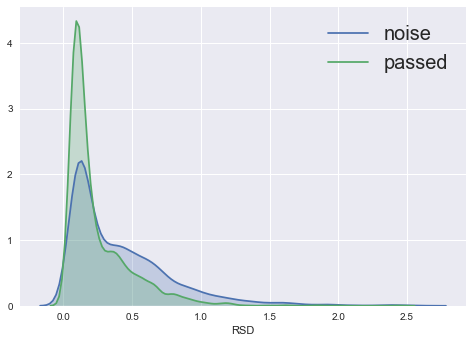

In [97]:
sns.distplot(QCs_noise['RSD'], label='noise', hist=False, kde_kws={'shade':'True'})
sns.distplot(QCs_pass['RSD'], label='passed', hist=False, kde_kws={'shade':'True'})
plt.legend(fontsize=20)
ax= plt.gca()
#ax.set_xlim(-.2,1)

In [13]:
QCs_noise[QCs_noise['RSD'] < .2].shape[0]

2164

In [14]:
QCs_pass[QCs_pass['RSD'] < .2].shape[0]

1410

([], <a list of 0 Text yticklabel objects>)

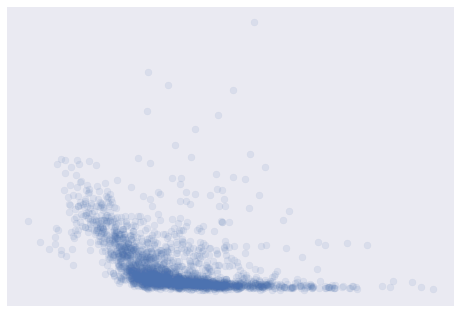

In [160]:
plt.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.1)
plt.xticks([])
plt.yticks([])
plt.title('')

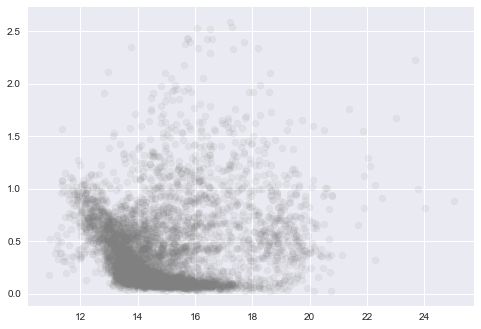

In [16]:
plt.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.1, c='grey')

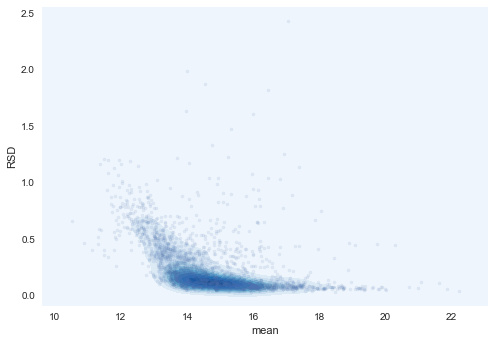

In [38]:
sns.kdeplot(np.log(QCs_pass['mean']), QCs_pass['RSD'], shade=True, cmap=plt.cm.Blues)
ax = plt.gca()
ax.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.1, s=10)

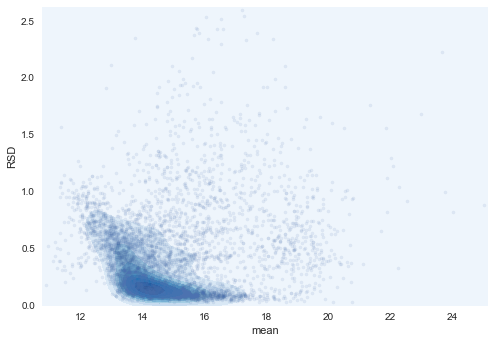

In [64]:
sns.kdeplot(np.log(QCs_noise['mean']), QCs_noise['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5)
ax = plt.gca()
ax.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.1, s=10)

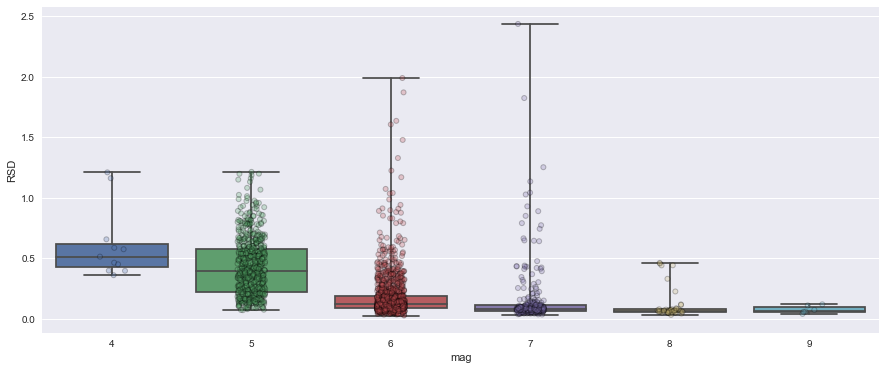

In [167]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_pass, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_pass, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
plt.savefig('box_strip.png')

In [161]:
QCs_noise.shape

(5376, 10)

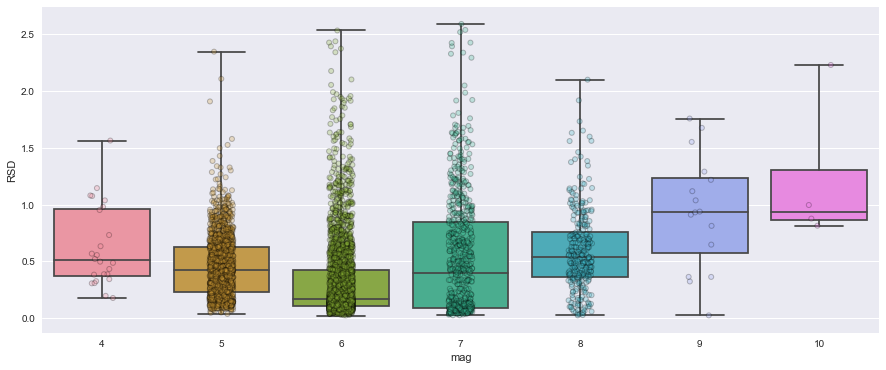

In [166]:
plt.figure(figsize=(15,6))
sns.boxplot('mag', 'RSD', data=QCs_noise, whis=np.inf)
sns.stripplot('mag', 'RSD', data=QCs_noise, jitter=True, edgecolor='k', linewidth=1, alpha=.25, dodge=True)
plt.savefig('box_strip_noise.png')

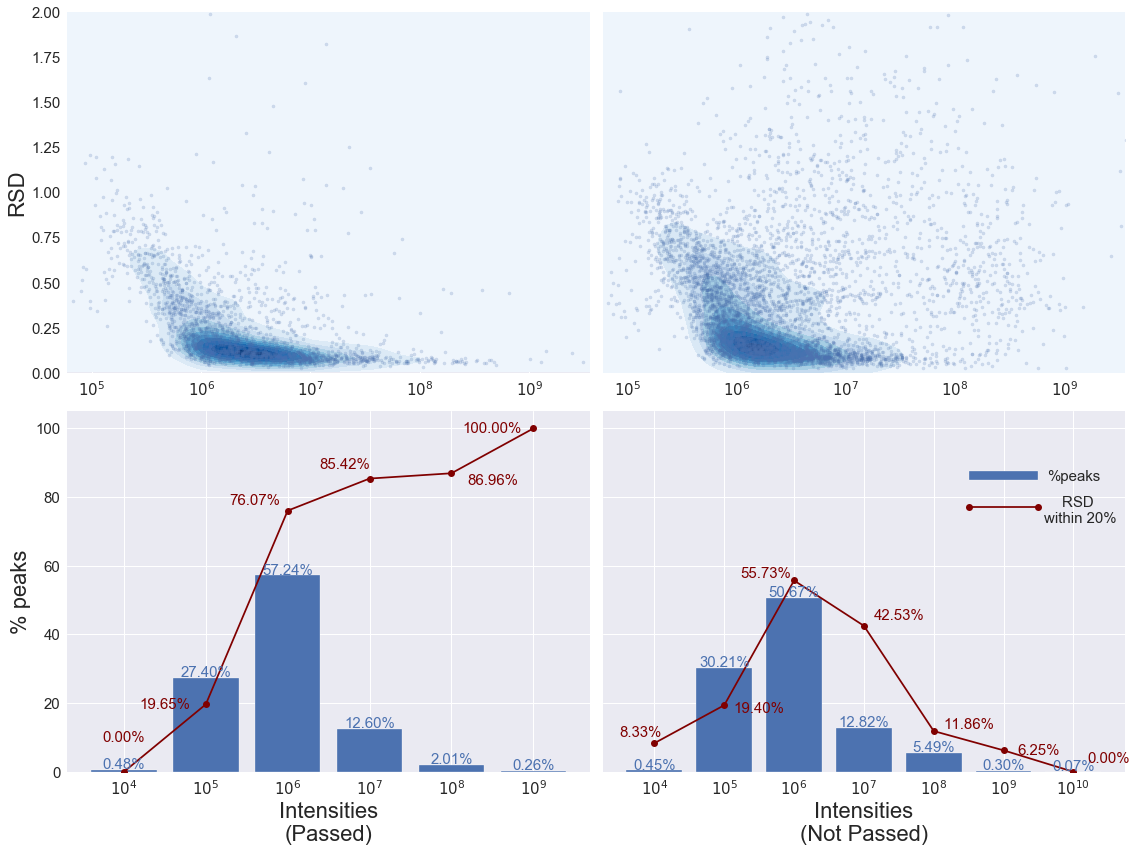

In [302]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.kdeplot(np.log(QCs_pass['mean']), QCs_pass['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax1)
ax1.scatter(np.log(QCs_pass['mean']), QCs_pass['RSD'], alpha=.2, s=10)

sns.kdeplot(np.log(QCs_noise['mean']), QCs_noise['RSD'], shade=True, cmap=plt.cm.Blues, cut=.5, ax=ax2)
ax2.scatter(np.log(QCs_noise['mean']), QCs_noise['RSD'], alpha=.2, s=10)

for i, ax in enumerate([ax1, ax2]):
    ax.set_xticks(np.log([1e5, 1e6, 1e7, 1e8, 1e9]))
    ax.set_xticklabels(['$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
    ax.set_xlim(11, 22)
    ax.set_ylim(0,2)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.set_ylabel('RSD', fontsize=22)
    ax.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels([])
# ax3
n_peaks_pass = QCs_pass.groupby('mag').aggregate('count').values.T[0] / QCs_pass.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
bars = ax3.bar(np.arange(6), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(6):
    ax3.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(6):
    per = QCs_pass[(QCs_pass['RSD'] <.2) & (QCs_pass['mag'] == i+4)].shape[0]
    per = per / QCs_pass.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
ax3.plot(np.arange(6), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[0,10], [-.5,0], [-.4,3], [-.3,4], [.5,-2], [-.5,0]]
for i in range(6):
    ax3.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax3.set_xticks(np.arange(6))
ax3.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'], fontsize=15)
ax3.set_ylim(0, 105)

# ax4
n_peaks_noise = QCs_noise.groupby('mag').aggregate('count').values.T[0] / QCs_noise.shape[0] *100
n_peaks_noise = np.round(n_peaks_noise, 2)
percent_noise = []
length = len(n_peaks_noise)

for n in n_peaks_noise:
    percent_noise.append('%.2f%%' % n)
    
bars = plt.bar(np.arange(length), n_peaks_noise, alpha=1)
c = bars[0].get_facecolor()
for i in range(length):
    plt.text(i, n_peaks_noise[i]+1.5, percent_noise[i], color=c[:3], ha='center', va='center', fontsize=15)
    
noise_02 = []
for i in range(length):
    per = QCs_noise[(QCs_noise['RSD'] <.2) & (QCs_noise['mag'] == i+4)].shape[0]
    per = per / QCs_noise.groupby('mag').aggregate('count').values.T[0][i] * 100
    noise_02.append(per)
    
plt.plot(np.arange(length), noise_02, c='maroon', marker='o')

noise_02_str = []
for per in noise_02:
    noise_02_str.append('%.2f%%' % per)

loc_off = [[-.2,3], [.5,-1], [-.4,2], [.5,3], [.5,2], [.5,0], [0.5,4]]
for i in range(length):
    plt.text(i+loc_off[i][0], noise_02[i]+loc_off[i][1], noise_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')

ax4.set_xticks(np.arange(length))
ax4.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$', '$10^{10}$'], fontsize=15)

for i, ax in enumerate([ax3, ax4]):
    ax.set_ylabel('% peaks', fontsize=22)
    ax.yaxis.set_tick_params(labelsize=15)
    labels = ['(Passed)', '(Not Passed)']
    ax.set_xlabel('Intensities\n%s' % labels[i], fontsize=22)
    

rect = Rectangle((4.5, 85), 1, 2.5)
ax4.add_patch(rect)
ax4.text(6, 86, '%peaks', ha='center', va='center', fontsize=15)
line = Line2D([4.5, 5.5], [77, 77], color='maroon', marker='o')
ax4.text(6.1, 76, 'RSD \nwithin 20%', ha='center', va='center', fontsize=15)
ax4.add_line(line)
ax4.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylim(0,105)

plt.tight_layout()
plt.savefig('compare.png')

(0, 100)

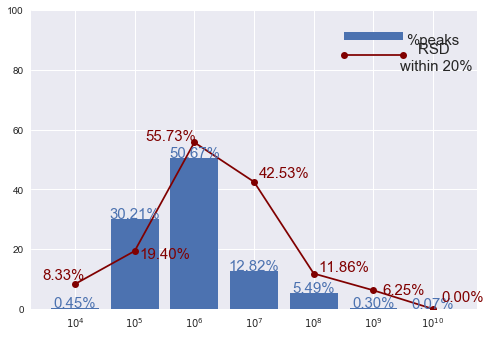

In [9]:
n_peaks_pass = QCs_noise.groupby('mag').aggregate('count').values.T[0] / QCs_noise.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
length = len(n_peaks_pass)

for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
    
bars = plt.bar(np.arange(length), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(length):
    plt.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(length):
    per = QCs_noise[(QCs_noise['RSD'] <.2) & (QCs_noise['mag'] == i+4)].shape[0]
    per = per / QCs_noise.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
plt.plot(np.arange(length), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[-.2,3], [.5,-1], [-.4,2], [.5,3], [.5,2], [.5,0], [0.5,4]]
for i in range(length):
    plt.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax = plt.gca()   
ax.set_xticks(np.arange(length))
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$', '$10^{10}$'])

rect = Rectangle((4.5, 90), 1, 2.5)
ax.add_patch(rect)
ax.text(6, 90, '%peaks', ha='center', va='center', fontsize=15)
line = Line2D([4.5, 5.5], [85, 85], color='maroon', marker='o')
ax.text(6.05, 84, 'RSD \nwithin 20%', ha='center', va='center', fontsize=15)
ax.add_line(line)
ax.set_ylim(0,100)

[Text(0, 0, '$10^4$'),
 Text(0, 0, '$10^5$'),
 Text(0, 0, '$10^6$'),
 Text(0, 0, '$10^7$'),
 Text(0, 0, '$10^8$'),
 Text(0, 0, '$10^9$')]

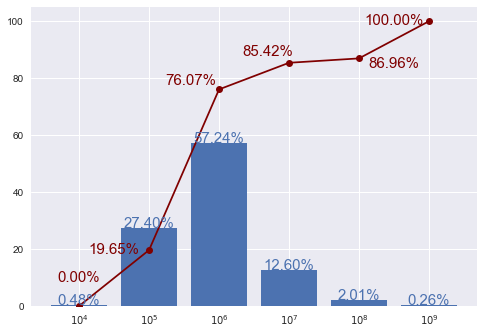

In [313]:
n_peaks_pass = QCs_pass.groupby('mag').aggregate('count').values.T[0] / QCs_pass.shape[0] *100
n_peaks_pass = np.round(n_peaks_pass, 2)
percent_pass = []
for n in n_peaks_pass:
    percent_pass.append('%.2f%%' % n)
bars = plt.bar(np.arange(6), n_peaks_pass, alpha=1)
c = bars[0].get_facecolor()
for i in range(6):
    plt.text(i, n_peaks_pass[i]+1.5, percent_pass[i], color=c[:3], ha='center', va='center', fontsize=15)
    
pass_02 = []
for i in range(6):
    per = QCs_pass[(QCs_pass['RSD'] <.2) & (QCs_pass['mag'] == i+4)].shape[0]
    per = per / QCs_pass.groupby('mag').aggregate('count').values.T[0][i] * 100
    pass_02.append(per)
    
plt.plot(np.arange(6), pass_02, c='maroon', marker='o')

pass_02_str = []
for per in pass_02:
    pass_02_str.append('%.2f%%' % per)

loc_off = [[0,10], [-.5,0], [-.4,3], [-.3,4], [.5,-2], [-.5,0]]
for i in range(6):
    plt.text(i+loc_off[i][0], pass_02[i]+loc_off[i][1], pass_02_str[i],
            va='center', ha='center',
            fontsize=15, color='maroon')
ax = plt.gca()   
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$', '$10^9$'])   

In [169]:
QCs_pass[QCs_pass['RSD'] >.2].shape

(875, 10)

In [428]:
QCs_final = QCs_pass[QCs_pass['RSD'] <.2]
QCs_final = QCs_eq.loc[QCs_final.index].join(QCs_final).dropna().iloc[:, :15]

In [168]:
QCs_final.shape

(1397, 15)

In [429]:
QCs_final.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'QC_3_1.mzXML', 'QC_1_2.mzXML', 'QC_5_3.mzXML', 'QC_3_3.mzXML',
       'QC_3_2.mzXML', 'QC_4_3.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [419]:
from sklearn.decomposition import PCA

In [49]:
QCs_PCA = PCA(n_components=8).fit_transform(np.log(QCs_final.T))

In [50]:
QCs_PCA.shape

(15, 8)

In [51]:
colors = [1,2,3,4] + [10]*11
colors

[1, 2, 3, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

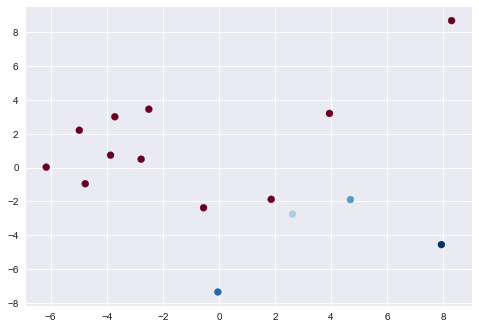

In [52]:
plt.scatter(QCs_PCA[:,0], QCs_PCA[:, 1], c=colors, cmap=plt.cm.RdBu_r)

In [111]:
Samples_final = Samples.iloc[QCs_final.index]

In [112]:
allsamples = QCs_final.join(Samples_final).dropna()

seq = [0, 1, 2, 3, 4, 5, 6, 7, 
      25, 16, 8, 
      28, 22, 17, 9,
      27, 19, 29, 10, 
      23, 24, 11, 
      20, 26, 12, 
      15, 13, 
      18, 21, 14]

allsamples = allsamples.iloc[:,seq]

In [115]:
allsamples.columns

Index(['QC_2_3.mzXML', 'QC_1_1.mzXML', 'QC_2_2.mzXML', 'QC_4_2.mzXML',
       'QC_1_3.mzXML', 'QC_5_2.mzXML', 'QC_5_1.mzXML', 'QC_2_1.mzXML',
       'Sample_4_2.mzXML', 'Sample_1_2.mzXML', 'QC_3_1.mzXML',
       'Sample_5_2.mzXML', 'Sample_3_2.mzXML', 'Sample_1_3.mzXML',
       'QC_1_2.mzXML', 'Sample_5_1.mzXML', 'Sample_2_2.mzXML',
       'Sample_5_3.mzXML', 'QC_5_3.mzXML', 'Sample_3_3.mzXML',
       'Sample_4_1.mzXML', 'QC_3_3.mzXML', 'Sample_2_3.mzXML',
       'Sample_4_3.mzXML', 'QC_3_2.mzXML', 'Sample_1_1.mzXML', 'QC_4_3.mzXML',
       'Sample_2_1.mzXML', 'Sample_3_1.mzXML', 'QC_4_1.mzXML'],
      dtype='object')

In [116]:
PCA_allsamples = PCA(n_components=8).fit_transform(np.log(allsamples.T))

In [118]:
def deal_names(cols):
    re = []
    for i, name in enumerate(cols):
        if i in [0, 1, 2]:
            re.append('QC-eq-%s' % str(i+1))
        elif i in [3, 4, 5, 6, 7]:
            re.append('QC-eq')
        elif name.startswith('Sa'):
            name = name[:10]
            re.append('Sa-%s' % name[-3])
        else:
            re.append('QC-nor')
    
    return re

In [121]:
names = deal_names(allsamples.columns)

In [141]:
colormap = {'QC-eq-1': ['darkred',True], 'QC-eq-2':['red', True], 'QC-eq-3':['lightcoral', True], 
            'QC-eq': ['gold', True], 'QC-nor': ['olive', True], 
           'Sa-1': ['plum', True], 'Sa-2': ['skyblue', True], 'Sa-3': ['teal', True], 'Sa-4': ['forestgreen', True], 'Sa-5': ['peru', True]}
colormap

{'QC-eq-1': ['darkred', True],
 'QC-eq-2': ['red', True],
 'QC-eq-3': ['lightcoral', True],
 'QC-eq': ['gold', True],
 'QC-nor': ['olive', True],
 'Sa-1': ['plum', True],
 'Sa-2': ['skyblue', True],
 'Sa-3': ['teal', True],
 'Sa-4': ['forestgreen', True],
 'Sa-5': ['peru', True]}

In [148]:
pca_mat = pd.DataFrame(PCA_allsamples)

In [175]:
pca_mat['class'] = names
pca_mat['cate'] = pca_mat['class'].str[:2]
pca_mat.head()

,0,1,2,3,4,5,6,7,class,cate
0,-1.096643,-0.646501,-7.106137,-0.596634,-6.241293,-2.073621,2.648925,5.658996,QC-eq-1,QC
1,4.003415,-1.208744,-3.300326,0.177948,-3.378547,-2.628035,0.205965,3.535194,QC-eq-2,QC
2,-1.082362,-0.513642,-6.693834,-0.750171,-5.339916,-1.708004,1.601172,3.356947,QC-eq-3,QC
3,0.251275,-0.893623,-5.324212,0.411914,-5.033008,-0.780902,0.625079,1.873945,QC-eq,QC
4,0.080883,-1.180220,-5.458777,0.212050,-5.206631,-0.506962,0.997429,0.667268,QC-eq,QC


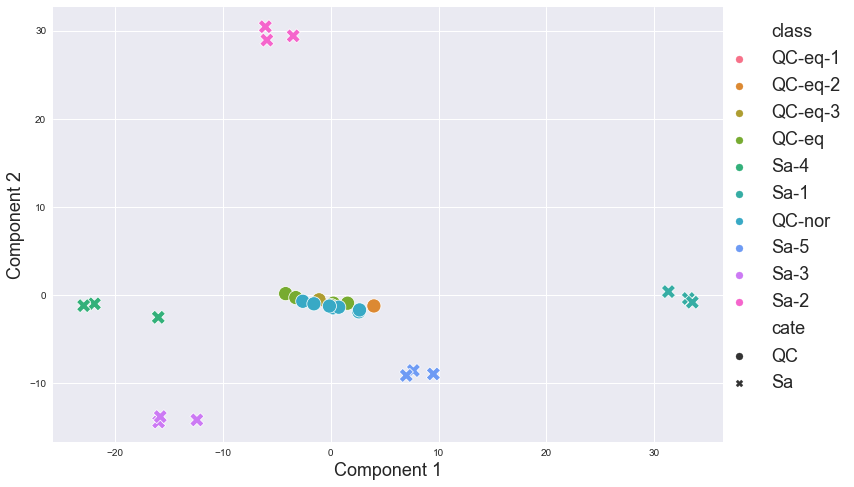

In [345]:
plt.figure(figsize=(12,8))
scatters = sns.scatterplot(0, 1, hue='class', style='cate', data=pca_mat, s=200)
plt.legend(fontsize=18, bbox_to_anchor=[1,1, .2, 0])
plt.xlabel('Component 1', fontsize=18)
plt.ylabel('Component 2', fontsize=18)

plt.savefig('pca_all.png')

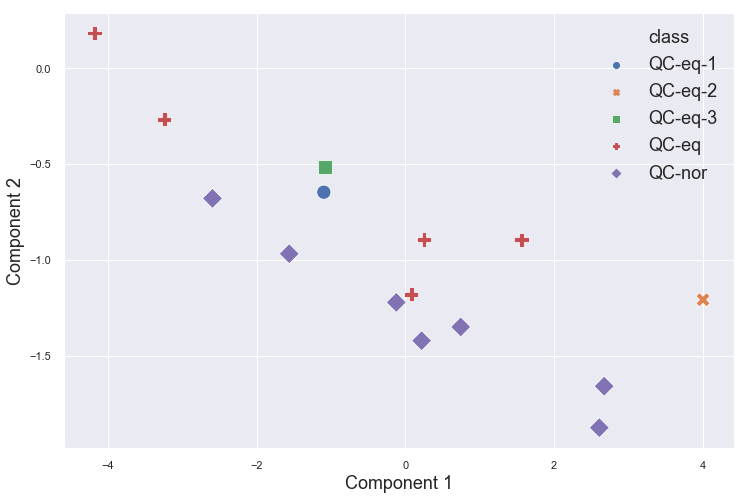

In [299]:
plt.figure(figsize=(12,8))
sns.scatterplot(0, 1, hue='class', style='class', data=pca_mat[pca_mat['cate']=='QC'], s=200)
plt.legend(fontsize=18)
plt.xlabel('Component 1', fontsize=18)
plt.ylabel('Component 2', fontsize=18)
plt.savefig('pca_qc.png')

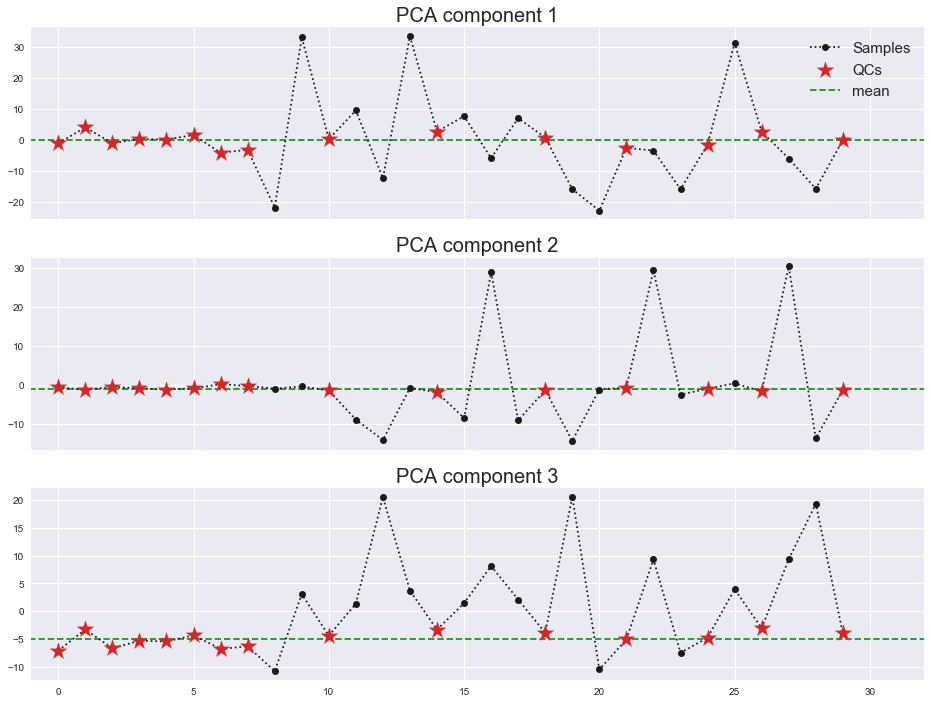

In [337]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(pca_mat[0], ':o', c='k', label='Samples')
ax1.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][0], marker='*', s=300, c='tab:red', zorder=10, label='QCs')
ax1.set_xticklabels([])
ax1.set_title('PCA component 1', fontsize=20)
ax1.hlines(pca_mat[pca_mat['cate'] == 'QC'][0].mean(), -10, 40, linestyle='--', color='forestgreen', label='mean')
ax1.set_xlim(-1,32)
ax1.legend(fontsize=15)

ax2.plot(pca_mat[1], ':o', c='k', )
ax2.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][1], marker='*', s=300, c='tab:red', zorder=10)
ax2.set_xticklabels([])
ax2.set_title('PCA component 2', fontsize=20)
ax2.hlines(pca_mat[pca_mat['cate'] == 'QC'][1].mean(), -10, 40, linestyle='--', color='forestgreen')
ax2.set_xlim(-1,32)

ax3.plot(pca_mat[2], ':o', c='k', )
ax3.scatter(pca_mat[pca_mat['cate'] == 'QC'].index, pca_mat[pca_mat['cate'] == 'QC'][2], marker='*', s=300, c='tab:red', zorder=10)
ax3.set_title('PCA component 3', fontsize=20)
ax3.hlines(pca_mat[pca_mat['cate'] == 'QC'][2].mean(), -10, 40, linestyle='--', color='forestgreen')
ax3.set_xlim(-1,32)
plt.savefig('PCA_123.png')

In [111]:
lm_test = test.sort_values(by='R2_modified', ascending=False).iloc[[2]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T

In [112]:
lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]

In [123]:
lm_test.rename({lm_test.columns[0]:'y'}, axis=1)

,y,x
0.10,NaN,0.10
0.15,NaN,0.15
0.30,4.851030e+05,0.30
0.50,8.736672e+05,0.50
0.75,1.282589e+06,0.75
1.00,1.730982e+06,1.00


In [51]:
test.sort_values(by='R2_modified', ascending=False)

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?,R2_modified
4152,FT4153,3.500155e+05,4.359145e+05,9.938976e+05,1.548381e+06,2.468353e+06,3.220163e+06,9.984008e-01,True,9.984008e-01
6285,FT6286,NaN,NaN,7.658359e+05,1.217857e+06,1.804966e+06,2.465282e+06,NaN,True,9.983103e-01
6494,FT6495,NaN,NaN,4.851030e+05,8.736672e+05,1.282589e+06,1.730982e+06,NaN,True,9.982151e-01
4811,FT4812,4.115848e+05,7.200803e+05,1.627503e+06,2.637766e+06,3.870653e+06,5.107565e+06,9.981895e-01,True,9.981895e-01
1674,FT1675,1.325474e+07,1.944531e+07,4.032408e+07,7.048957e+07,1.094545e+08,1.405793e+08,9.981508e-01,True,9.981508e-01
6431,FT6432,3.323728e+05,6.054901e+05,1.341879e+06,2.285583e+06,3.521311e+06,4.616626e+06,9.977507e-01,True,9.977507e-01
4063,FT4064,2.771952e+05,4.739047e+05,1.128669e+06,1.713193e+06,2.577258e+06,3.512322e+06,9.975490e-01,True,9.975490e-01
3949,FT3950,4.770796e+05,5.944078e+05,1.563973e+06,2.463217e+06,3.829006e+06,4.970750e+06,9.974728e-01,True,9.974728e-01
8474,FT8475,NaN,NaN,7.137643e+05,1.115595e+06,1.628041e+06,2.213158e+06,NaN,True,9.973631e-01
7195,FT7196,4.031846e+05,5.753893e+05,9.869486e+05,1.737768e+06,2.759264e+06,3.662055e+06,9.972258e-01,True,9.972258e-01


In [76]:
test.sort_values(by='R2_modified', ascending=False).iloc[[2000]]

,F_index,0.10,0.15,0.30,0.50,0.75,1.00,R2,normal?,R2_modified
5390,FT5391,483847.483792,576890.909517,910166.039062,699121.6328,2.683665e+06,3.254355e+06,0.856094,True,0.856094


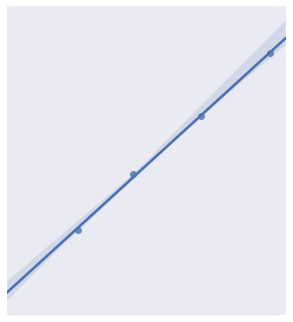

In [114]:
sns.lmplot('x', 'y', data=lm_test)
plt.yticks([])
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('filter_illus.png')

In [132]:
def get_R2_final(x):
    x = x.fillna(-1)

    y_i = np.array([0.1, 0.15, 0.3, 0.5, 0.75, 1])
    
    y_hat = x / x[-1]
    
    pivot = 0
    for i in range(6):
        if not  x[i] == -1:
            pivot = i
            break
           
    y_i = y_i[pivot:]
    y_hat = y_hat[pivot:]
    return r2_score(y_i, y_hat)

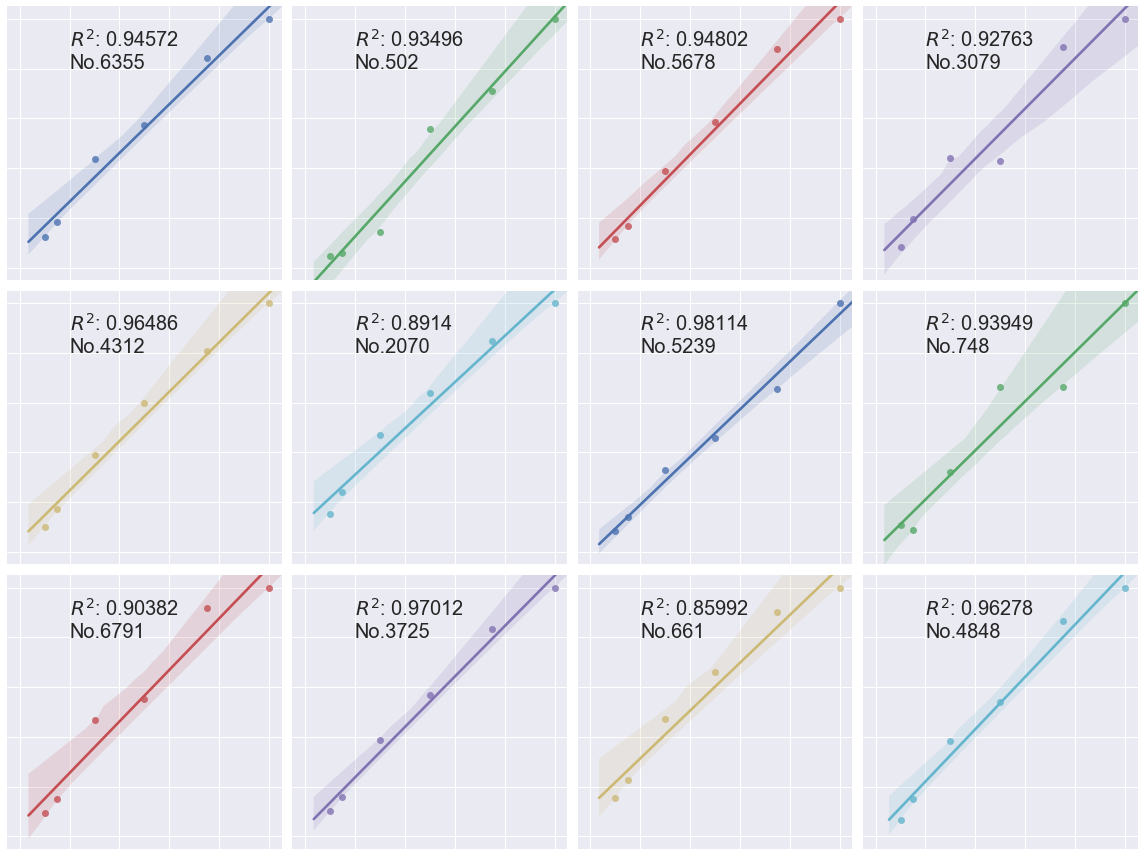

In [159]:
fig = plt.figure(figsize=(16,12))
axs = []
df = test.sort_values(by='R2_modified', ascending=False)[:2000].sample(12)
indices = df.index[:12]
for i in range(12):
    axs.append(fig.add_subplot(3, 4, i+1))

for i, ax in enumerate(axs):
    lm_test = df.loc[[indices[i]]][['0.10', '0.15', '0.30', '0.50', '0.75', '1.00']].T
    lm_test['x'] = [0.1, 0.15, 0.3, 0.5, 0.75, 1]
    lm_test = lm_test.rename({lm_test.columns[0]:'y'}, axis=1)
    lm_test['y'] = lm_test['y'] / lm_test['y'][-1]
    
    sns.regplot('x', 'y', data=lm_test, ax=ax)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    
    R2 = get_R2_final(lm_test['y'])
    R2 = round(R2, 5)
    
    index = indices[i]
    
    ax.text(.2, .8, '$R^2$: %s\nNo.%s' % (R2, index), fontsize=20)
    
plt.tight_layout()
plt.savefig('12lmplot.png', dpi=96)

In [11]:
xx = np.linspace(0, 25, 1000)
yy = np.zeros(1000)

In [12]:
for i, x in enumerate(xx):
    if x < 2:
        yy[i] = 2
    if 2 <= x < 8:
        yy[i] = 2 + (x-2) * 8
    if 8 <= x < 16:
        yy[i] = 50
    if 16 <= x < 17:
        yy[i] = 50 + (x-16) * 48
    if 17 <= x < 21:
        yy[i] = 98
    if 21 <= x < 21.1:
        yy[i] = 98 - (x-21) * 960
    if x >= 21.1:
        yy[i] = 2

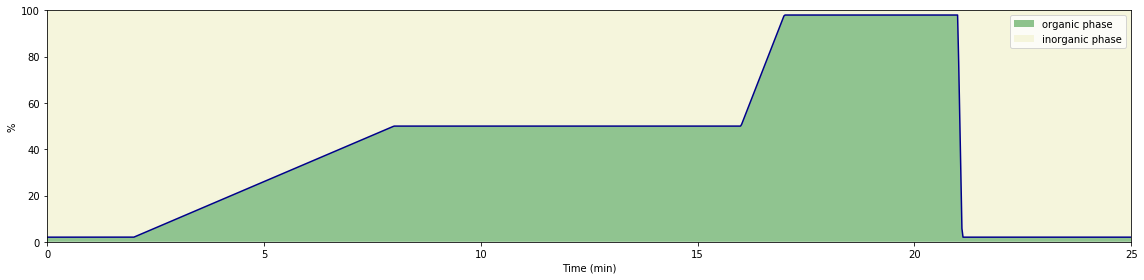

In [33]:
plt.figure(figsize=(16, 4))
plt.plot(xx, yy, c='darkblue')
plt.fill_between(xx, 0, yy, facecolor='forestgreen', alpha=.5, label='organic phase')
plt.fill_between(xx, yy, 100, facecolor='beige', alpha=1, label='inorganic phase')
plt.xlim(0,25)
plt.ylim(0,100)
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('gradient.png')

In [34]:
now = time.strftime('%H %M-%d%h')
dill.dump_session('%s.jupyterData' % now)